# Train a Model for Detecting Surface Water

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/train_water_detection.ipynb)

## Install package
To use the `geoai-py` package, ensure it is installed in your environment. Uncomment the command below if needed.

In [2]:
%pip install geoai-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
  

## Import libraries

In [1]:
import geoai

## Download sample data

In [2]:
train_raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip/naip_water_train.tif"
train_masks_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip/naip_water_masks.tif"
test_raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip/naip_water_test.tif"

In [3]:
train_raster_path = geoai.download_file(train_raster_url)
train_masks_path = geoai.download_file(train_masks_url)
test_raster_path = geoai.download_file(test_raster_url)

naip_water_train.tif: 100%|██████████| 150M/150M [00:04<00:00, 35.8MB/s]
naip_water_masks.tif: 100%|██████████| 421k/421k [00:00<00:00, 54.1MB/s]
naip_water_test.tif: 100%|██████████| 158M/158M [00:02<00:00, 78.4MB/s]


In [4]:
geoai.print_raster_info(train_raster_path, show_preview=False)

===== RASTER INFORMATION: naip_water_train.tif =====
Driver: GTiff
Dimensions: 5390 x 7580 pixels
Number of bands: 4
Data type: uint8
Coordinate Reference System: EPSG:26914
Georeferenced Bounds: BoundingBox(left=485430.0, bottom=5204860.0, right=490820.0, top=5212440.0)
Pixel Resolution: 1.0, 1.0
NoData Value: None

----- Band Statistics -----
Band 1:
  Min: 36.00
  Max: 238.00
  Mean: 127.01
  Std Dev: 34.38
Band 2:
  Min: 46.00
  Max: 233.00
  Mean: 121.56
  Std Dev: 22.03
Band 3:
  Min: 57.00
  Max: 237.00
  Mean: 105.59
  Std Dev: 18.37
Band 4:
  Min: 19.00
  Max: 238.00
  Mean: 135.77
  Std Dev: 36.26


## Visualize sample data

In [5]:
geoai.view_raster(train_masks_url, nodata=0, basemap=train_raster_url)

In [6]:
geoai.view_raster(test_raster_url)

## Create training data

In [7]:
out_folder = "output"

In [8]:
tiles = geoai.export_geotiff_tiles(
    in_raster=train_raster_path,
    out_folder=out_folder,
    in_class_data=train_masks_path,
    tile_size=512,
    stride=128,
    buffer_radius=0,
)

Detected in_class_data as raster: naip_water_masks.tif
Raster CRS: EPSG:26914
Raster dimensions: 5420 x 7602

Raster info for naip_water_train.tif:
  CRS: EPSG:26914
  Dimensions: 5390 x 7580
  Resolution: (1.0, 1.0)
  Bands: 4
  Bounds: BoundingBox(left=485430.0, bottom=5204860.0, right=490820.0, top=5212440.0)
Found 1 unique classes in raster: [1]


Generated: 2280, With features: 2170: 100%|██████████| 2280/2280 [03:10<00:00, 11.98it/s]


------- Export Summary -------
Total tiles exported: 2280
Tiles with features: 2170 (95.2%)
Average feature pixels per tile: 101525.1
Output saved to: output

------- Georeference Verification -------


## Train object detection model

In [9]:
geoai.train_MaskRCNN_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/labels",
    output_dir=f"{out_folder}/models",
    num_channels=4,
    pretrained=True,
    batch_size=4,
    num_epochs=10,
    learning_rate=0.005,
    val_split=0.2,
)

Using device: cuda
Found 2280 image files and 2280 label files
Training on 1824 images, validating on 456 images


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 168MB/s]


Epoch: 0, Batch: 0/456, Loss: 5.5054, Time: 4.88s
Epoch: 0, Batch: 10/456, Loss: 1.6062, Time: 8.92s
Epoch: 0, Batch: 20/456, Loss: 0.6161, Time: 9.19s
Epoch: 0, Batch: 30/456, Loss: 1.3429, Time: 9.15s
Epoch: 0, Batch: 40/456, Loss: 1.0927, Time: 9.28s
Epoch: 0, Batch: 50/456, Loss: 0.9926, Time: 9.58s
Epoch: 0, Batch: 60/456, Loss: 1.0898, Time: 9.58s
Epoch: 0, Batch: 70/456, Loss: 0.8438, Time: 9.55s
Epoch: 0, Batch: 80/456, Loss: 0.5729, Time: 9.81s
Epoch: 0, Batch: 90/456, Loss: 0.8790, Time: 9.78s
Epoch: 0, Batch: 100/456, Loss: 0.6807, Time: 10.05s
Epoch: 0, Batch: 110/456, Loss: 0.8632, Time: 10.09s
Epoch: 0, Batch: 120/456, Loss: 0.7165, Time: 10.16s
Epoch: 0, Batch: 130/456, Loss: 0.8133, Time: 10.35s
Epoch: 0, Batch: 140/456, Loss: 0.2874, Time: 9.89s
Epoch: 0, Batch: 150/456, Loss: 1.0220, Time: 9.87s
Epoch: 0, Batch: 160/456, Loss: 0.6854, Time: 10.11s
Epoch: 0, Batch: 170/456, Loss: 0.6579, Time: 10.15s
Epoch: 0, Batch: 180/456, Loss: 0.8134, Time: 10.14s
Epoch: 0, Batch:

## Run inference

In [10]:
masks_path = "naip_water_prediction.tif"
model_path = f"{out_folder}/models/best_model.pth"

In [11]:
geoai.object_detection(
    test_raster_path,
    masks_path,
    model_path,
    window_size=512,
    overlap=128,
    confidence_threshold=0.3,
    batch_size=4,
    num_channels=4,
)

Processing 280 windows with size 512x512 and overlap 128...


315it [00:32,  9.84it/s]


Inference completed in 32.59 seconds
Saved prediction to naip_water_prediction.tif


## Vectorize masks

In [12]:
output_path = "naip_water_prediction.geojson"
gdf = geoai.raster_to_vector(
    masks_path, output_path, min_area=1000, simplify_tolerance=1
)

Vectorized data saved to naip_water_prediction.geojson


In [13]:
gdf = geoai.add_geometric_properties(gdf)

In [14]:
len(gdf)

79

In [15]:
geoai.view_vector_interactive(gdf, tiles=test_raster_url)

<Axes: >

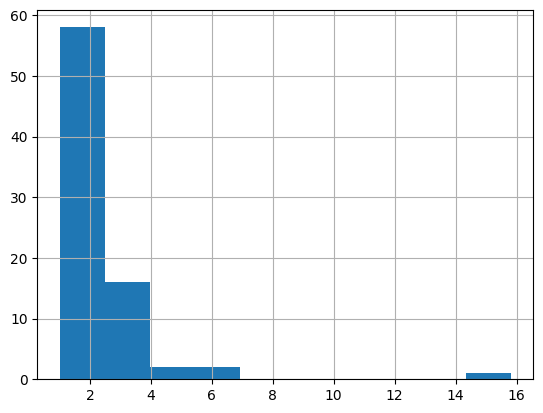

In [16]:
gdf["elongation"].hist()

In [17]:
gdf_filtered = gdf[gdf["elongation"] < 10]

In [18]:
len(gdf_filtered)

78

## Visualize results

In [19]:
geoai.view_vector_interactive(gdf_filtered, tiles=test_raster_url)

In [20]:
geoai.create_split_map(
    left_layer=gdf_filtered,
    right_layer=test_raster_url,
    left_args={"style": {"color": "red", "fillOpacity": 0.2}},
    basemap=test_raster_url,
)

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

![image](https://github.com/user-attachments/assets/a269b5a0-9f72-4ed8-8b2d-a175bbc45a23)